# Demonstration: Polynomial fits

First we have our standard header with common import statements, and a statement to make plots look nice.

In [1]:
# standard import statements
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as opt

# jupyter-specific display instructions
mpl.rcParams['font.size'] = 11
mpl.rcParams['lines.linewidth'] = 2
%config InlineBackend.figure_format = 'retina'

The demonstration is all about polynomial models, so let's define a bunch of them.

In [2]:
def p1(x, a, b):
    return a + b*x

def p2(x, a, b, c):
    return a + b*x + c*x**2

def p3(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

def p4(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

def p5(x, a, b, c, d, e, f):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

## Example 1

We start by loading some data and plotting it (this is always a good first step, though not something you would include in a report).

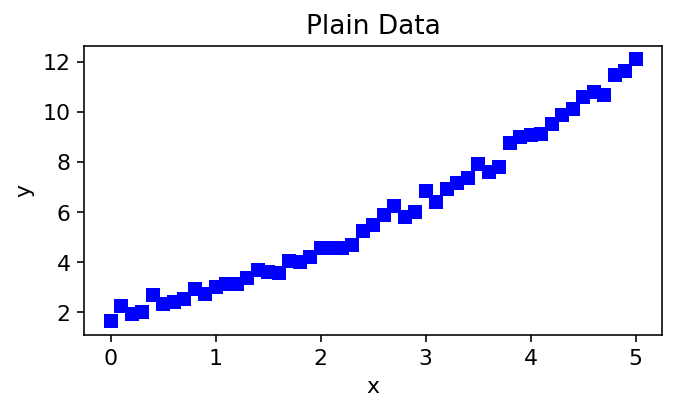

In [3]:
excel_file = 'data/demo-polynomial-1.xlsx'
mydata = pd.read_excel(excel_file)
x1 = np.array(mydata['x'])
y1 = np.array(mydata['y'])

plt.figure(figsize=(9,3))
plt.subplot(121)
plt.plot(x1, y1, 'bs')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plain Data')

plt.tight_layout()
plt.show()

Now we are going to fit the data to a polynomial.  Let's start with a line.

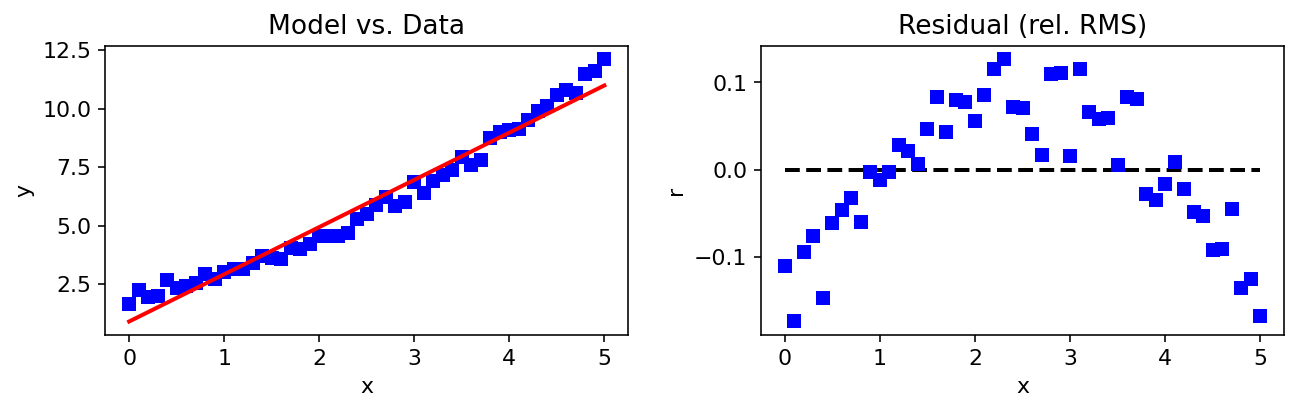



Parameter Values: 95%
---------------------
a =  0.9050 +- 0.1481
b =  2.0174 +- 0.0510

R-squared: 0.96957960




In [4]:
fit1, cov1 = opt.curve_fit(p1, x1, y1)
err1 = np.sqrt(np.diag(cov1))
ypr1 = p1(x1, *fit1)
res1 = ypr1 - y1
rms1 = np.sqrt(np.mean(y1**2))

plt.figure(figsize=(9,3))

plt.subplot(121)
plt.plot(x1, y1, 'bs')
plt.plot(x1, ypr1, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model vs. Data')

plt.subplot(122)
plt.plot(x1, 0*x1, 'k--')
plt.plot(x1, res1/rms1, 'bs')
plt.xlabel('x')
plt.ylabel('r')
plt.title('Residual (rel. RMS)')

plt.tight_layout()
plt.show()

# print a summary of the parameter values
print('\n')
print("Parameter Values: 95%")
print("---------------------")
print("a = %7.4f +- %1.4f" % (fit1[0], err1[0]))
print("b = %7.4f +- %1.4f" % (fit1[1], err1[1]))
print("")

# Calculate and Print the Adjusted R^2 value
ssres = np.sum(res1**2)
sstot = np.sum((y1-np.mean(y1))**2)
rsq   = 1 - ssres/sstot
print('R-squared: %1.8f' % rsq)
print('\n')

Okay, that isn't great -- Although the value of $R^2$ looks high, the residual has relative magnitude of up to about 12%, and clearly has coherent structure.  So let's try a quadratic.

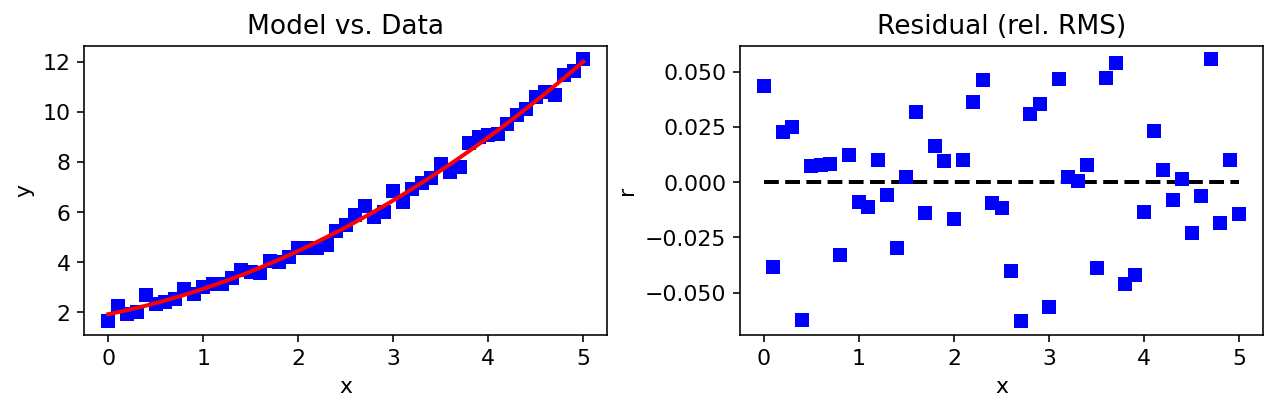



Parameter Values: 95%
---------------------
a =  1.9307 +- 0.0833
b =  0.7613 +- 0.0770
c =  0.2512 +- 0.0149

R-squared: 0.99560841




In [5]:
fit1, cov1 = opt.curve_fit(p2, x1, y1)
err1 = np.sqrt(np.diag(cov1))
ypr1 = p2(x1, *fit1)
res1 = ypr1 - y1
rms1 = np.sqrt(np.mean(y1**2))

plt.figure(figsize=(9,3))

plt.subplot(121)
plt.plot(x1, y1, 'bs')
plt.plot(x1, ypr1, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model vs. Data')

plt.subplot(122)
plt.plot(x1, 0*x1, 'k--')
plt.plot(x1, res1/rms1, 'bs')
plt.xlabel('x')
plt.ylabel('r')
plt.title('Residual (rel. RMS)')

plt.tight_layout()
plt.show()

# print a summary of the parameter values
print('\n')
print("Parameter Values: 95%")
print("---------------------")
print("a = %7.4f +- %1.4f" % (fit1[0], err1[0]))
print("b = %7.4f +- %1.4f" % (fit1[1], err1[1]))
print("c = %7.4f +- %1.4f" % (fit1[2], err1[2]))
print("")

# Calculate and Print the Adjusted R^2 value
dof = len(x1)-len(fit1)
ssres = np.sum(res1**2)
sstot = np.sum((y1-np.mean(y1))**2)
rsq   = 1 - ssres/sstot
print('R-squared: %1.8f' % rsq)
print('\n')

And this looks pretty good!  The residual magnitude has decreased a bit, to around 6%, but most importantly, there is no longer any obvious coherence in the residual.  Based on what we have learned so far, I would probably stop here.  Let's just report our final model as:

$$ y = A + Bx + Cx^2 $$
where
$$ A = 1.93 \pm 0.17 $$
$$ B = 0.76 \pm 0.15 $$
$$ C = 0.25 \pm 0.030 $$
at the 95% confidence level.

## Example 2

We start by loading some data and plotting it.

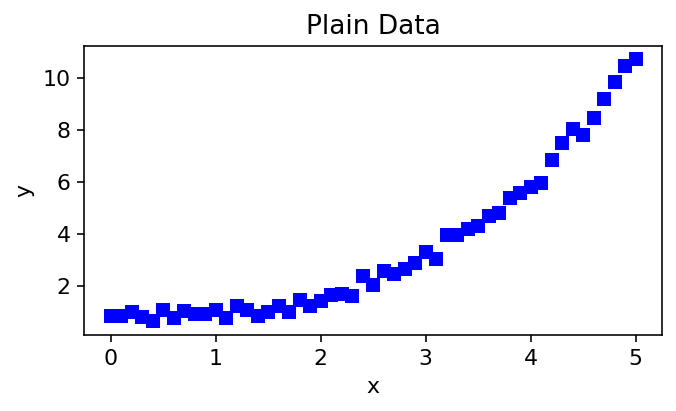

In [6]:
excel_file = 'data/demo-polynomial-2.xlsx'
mydata = pd.read_excel(excel_file)
x2 = np.array(mydata['x'])
y2 = np.array(mydata['y'])

plt.figure(figsize=(9,3))
plt.subplot(121)
plt.plot(x2, y2, 'bs')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plain Data')

plt.tight_layout()
plt.show()

Having learned our lesson from last time, we see that this clearly isn't linear, so let's start with a quadratic this time.

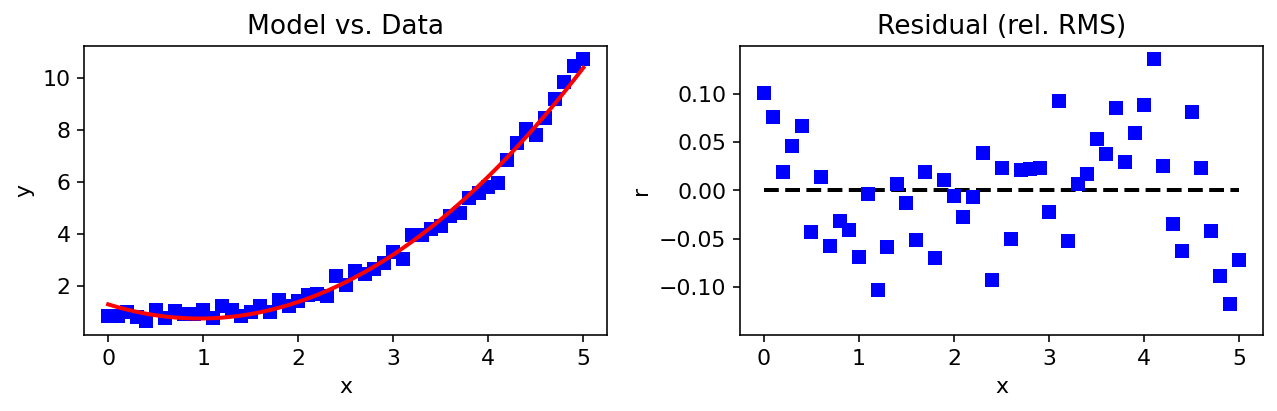



Parameter Values: 95%
---------------------
a =  1.2825 +- 0.1083
b = -1.1365 +- 0.1002
c =  0.5919 +- 0.0194

R-squared: 0.99211810




In [7]:
# get the fit and the residual
fit2, cov2 = opt.curve_fit(p2, x2, y2)
err2 = np.sqrt(np.diag(cov2))
ypr2 = p2(x2, *fit2)
res2 = ypr2 - y2
rms2 = np.sqrt(np.mean(y2**2))


# plot the data and the fit, together with the relative residual
plt.figure(figsize=(9,3))

plt.subplot(121)
plt.plot(x2, y2, 'bs')
plt.plot(x2, ypr2, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model vs. Data')

plt.subplot(122)
plt.plot(x2, 0*x2, 'k--')
plt.plot(x2, res2/rms2, 'bs')
omar = np.max(np.abs(res2/rms2))
plt.ylim(-1.1*omar, 1.1*omar)
plt.xlabel('x')
plt.ylabel('r')
plt.title('Residual (rel. RMS)')

plt.tight_layout()
plt.show()


# print a summary of the parameter values
print('\n')
print("Parameter Values: 95%")
print("---------------------")
print("a = %7.4f +- %1.4f" % (fit2[0], err2[0]))
print("b = %7.4f +- %1.4f" % (fit2[1], err2[1]))
print("c = %7.4f +- %1.4f" % (fit2[2], err2[2]))
print("")

# Calculate and Print the Adjusted R^2 value
dof = len(x2)-len(fit2)
ssres = np.sum(res2**2)
sstot = np.sum((y2-np.mean(y2))**2)
rsq   = 1 - ssres/sstot
print('R-squared: %1.8f' % rsq)
print('\n')


This looks pretty decent at first, with R-squared above 0.99, and most of the residual having a relative error under 10%.  This isn't terribe given the observable noise in the data.  However, I do see some coherence in the residual, and some notable deviations from the apparent trend in the data at low values of x.  So I'm going to try a cubic.

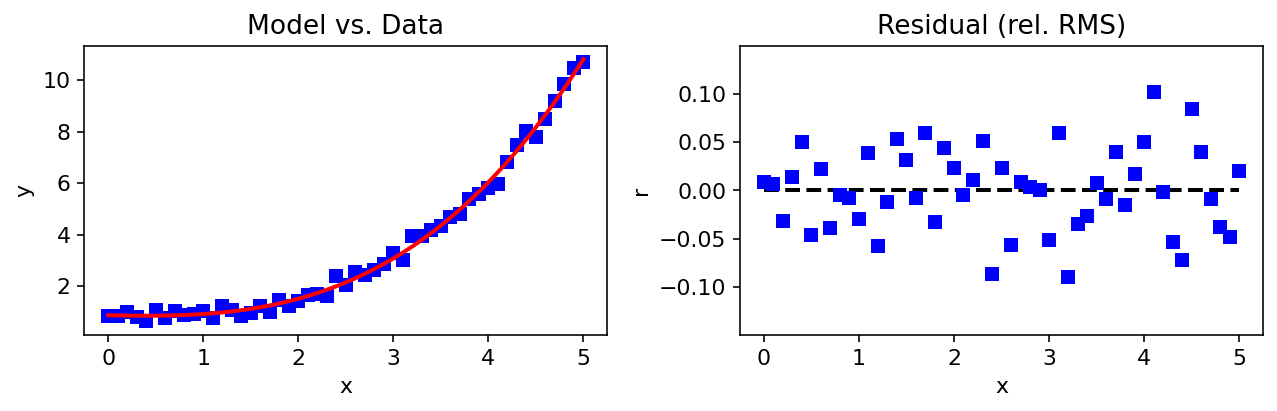



Parameter Values: 95%
---------------------
a =  0.8665 +- 0.1035
b = -0.0857 +- 0.1811
c =  0.0612 +- 0.0846
d =  0.0708 +- 0.0111

R-squared: 0.99576493




In [8]:
fit2, cov2 = opt.curve_fit(p3, x2, y2)
err2 = np.sqrt(np.diag(cov2))
ypr2 = p3(x2, *fit2)
res2 = ypr2 - y2
rms2 = np.sqrt(np.mean(y2**2))

plt.figure(figsize=(9,3))

plt.subplot(121)
plt.plot(x2, y2, 'bs')
plt.plot(x2, ypr2, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model vs. Data')

plt.subplot(122)
plt.plot(x2, 0*x2, 'k--')
plt.plot(x2, res2/rms2, 'bs')
plt.ylim(-1.1*omar, 1.1*omar)
plt.xlabel('x')
plt.ylabel('r')
plt.title('Residual (rel. RMS)')

plt.tight_layout()
plt.show()


# print a summary of the parameter values
print('\n')
print("Parameter Values: 95%")
print("---------------------")
print("a = %7.4f +- %1.4f" % (fit2[0], err2[0]))
print("b = %7.4f +- %1.4f" % (fit2[1], err2[1]))
print("c = %7.4f +- %1.4f" % (fit2[2], err2[2]))
print("d = %7.4f +- %1.4f" % (fit2[3], err2[3]))
print("")

# Calculate and Print the Adjusted R^2 value
dof = len(x2)-len(fit2)
ssres = np.sum(res2**2)
sstot = np.sum((y2-np.mean(y2))**2)
rsq   = 1 - ssres/sstot
print('R-squared: %1.8f' % rsq)
print('\n')


And this looks better!  Most elements of the relative residual are within about the 5% range, and I no longer see any low-frequency structure / coherence.  Following the reasoning in the first example, I would probably stop here and report my model, of the form
$$ y = A + Bx + Cx^2 + Dx^3$$
where
$$ A = 0.87 \pm 0.21 $$
$$ B = -0.086 \pm 0.36 $$
$$ C = 0.061 \pm 0.17 $$
$$ D = 0.071 \pm 0.022 $$
at the 95% confidence level.

# A helper function

Notice how we've been writing the same code over and over in each cell?  Like, basically just copy and pasting lots of code?  Whenever you find yourself doing that, it is usually a good idea to ***write a function*** that does all of the things in the code.  It's nice to do this as generically as possible, so that the function you write can be used as often as possible.

I've provided a small function in a file called "**classlib4334.py**," that contains a few helpful functions of this type.  You can use it as follows.

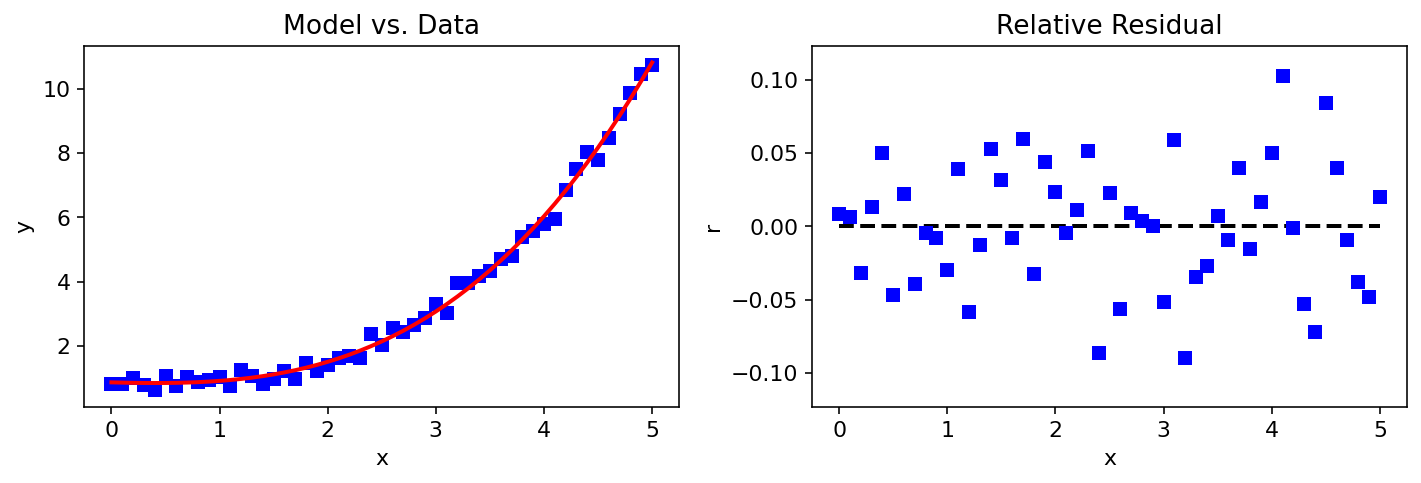

Parameter Values: 95%

   a =   0.866474 +- 0.207042
   b =  -0.085664 +- 0.362182
   c =   0.061200 +- 0.169279
   d =   0.070754 +- 0.022243

absolute r-squared: 0.99576493  (2.37 nines)
adjusted r-squared: 0.99549460  (2.35 nines)




In [9]:
import classlib4334

pfit, perr = classlib4334.fit_and_plot(p3, x2, y2)

See how much easier this is!  You can use it from now on.  Note:  we'll discuss the "Adjusted R-squared" in the next demonstration.